# Understanding the Bias-Variance Tradeoff
This notebook explores the critical machine learning concept of bias-variance tradeoff through practical examples.

In [1]:
# %%
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [2]:
# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

## Part 1: The Bias-Variance Tradeoff

The bias-variance tradeoff is a fundamental concept in machine learning that describes the balance between:

- **Bias**: How far the model's predictions are from the true values on average (underfitting)
- **Variance**: How much the model's predictions fluctuate for different training sets (overfitting)

Understanding this tradeoff helps us build models that generalize well to new data.

[https://mlu-explain.github.io/bias-variance/](https://mlu-explain.github.io/bias-variance/)

[https://medium.com/data-science/understanding-the-bias-variance-tradeoff-165e6942b229](https://medium.com/data-science/understanding-the-bias-variance-tradeoff-165e6942b229)

[https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)

In [1]:
# %%
# First, let's create some synthetic data with noise
def generate_data(n_samples=100, noise=0.3):
    # True function: f(x) = sin(2πx)
    X = np.random.uniform(0, 1, ...)
    y = np.sin(2 * np.pi * ...) + np.random.normal(0, ..., n_samples)
    return X, y

In [4]:
# Generate training and test data
X, y = generate_data(n_samples=100, noise=0.3)
X_train, X_test, y_train, y_test = ...(X, y, test_size=0.3, random_state=42)

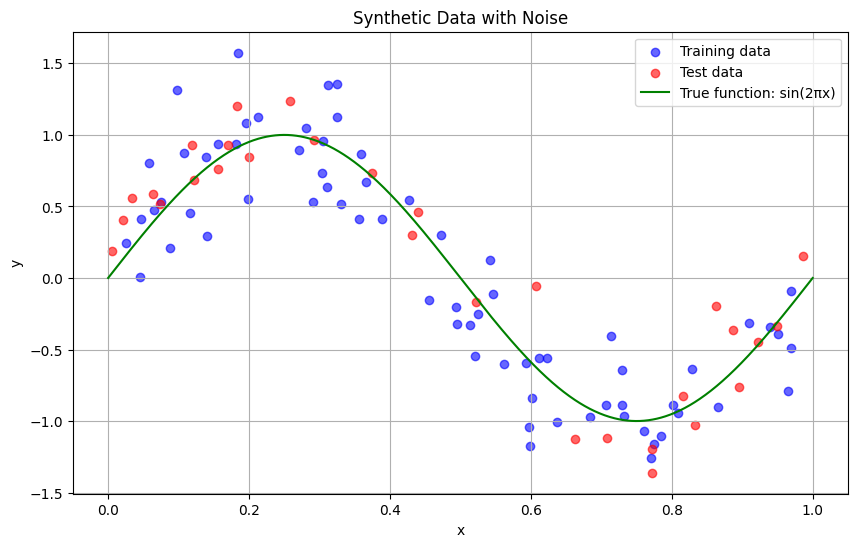

In [5]:
# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Training data')
plt.scatter(X_test, y_test, color='red', alpha=0.6, label='Test data')
# Plot the true function
X_true = np.linspace(0, 1, 1000)
y_true = np.sin(2 * np.pi * X_true)
plt.plot(X_true, y_true, 'g-', label='True function: sin(2πx)')
plt.title('Synthetic Data with Noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## Part 2: Understanding Underfitting (High Bias)

A model with high bias (underfitting):
- Is too simple to capture the underlying pattern
- Makes strong assumptions about the data
- Has high error on both training and test data

Let's see this with a linear model on our non-linear data.

In [6]:
# %%
# Create a linear model (too simple for our data)
linear_model = make_pipeline(
    ...(degree=1),  # This polynomial with degree one is just a linear model
    LinearRegression()
)

In [7]:
# Fit the model
linear_model.fit(..., y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression())])

In [8]:
# Make predictions
X_plot = np.linspace(0, 1, 1000).reshape(-1, 1)
y_linear_pred = linear_model.predict(X_plot)

In [9]:
# Calculate errors
y_linear_train_pred = linear_model.predict(...)
y_linear_test_pred = linear_model.predict(...)
linear_train_mse = ...(y_train, y_linear_train_pred)
linear_test_mse = ...(y_test, y_linear_test_pred)

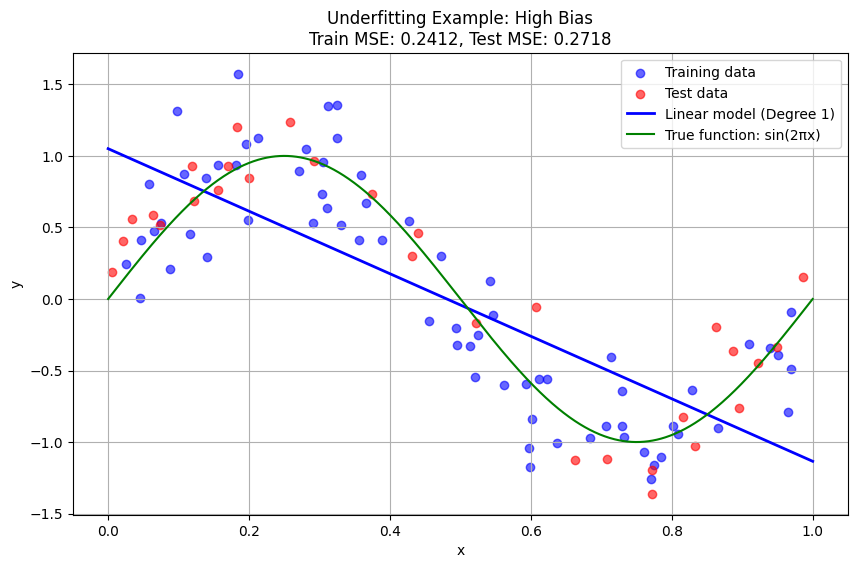

In [56]:
# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Training data')
plt.scatter(X_test, y_test, color='red', alpha=0.6, label='Test data')
plt.plot(X_plot, y_linear_pred, 'b-', linewidth=2, label=f'Linear model (Degree 1)')
plt.plot(X_true, y_true, 'g-', label='True function: sin(2πx)')
plt.title(f'Underfitting Example: High Bias\nTrain MSE: {linear_train_mse:.4f}, Test MSE: {linear_test_mse:.4f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## Part 3: Understanding Overfitting (High Variance)

A model with high variance (overfitting):
- Is too complex and captures noise in the data
- Fits the training data extremely well
- Performs poorly on new, unseen data

Let's see this with a high-degree polynomial model.

In [12]:
# %%
# Create a complex polynomial model
complex_model = make_pipeline(
    ...(degree=15),  # Very high degree polynomial
    ...
)

In [13]:
# Fit the model
complex_model.fit(..., y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=15)),
                ('linearregression', LinearRegression())])

In [14]:
# Make predictions
y_complex_pred = complex_model.predict(X_plot)

In [15]:
# Calculate errors
y_complex_train_pred = complex_model.predict(X_train.reshape(-1, 1))
y_complex_test_pred = complex_model.predict(X_test.reshape(-1, 1))
complex_train_mse = mean_squared_error(y_train, y_complex_train_pred)
complex_test_mse = mean_squared_error(y_test, y_complex_test_pred)

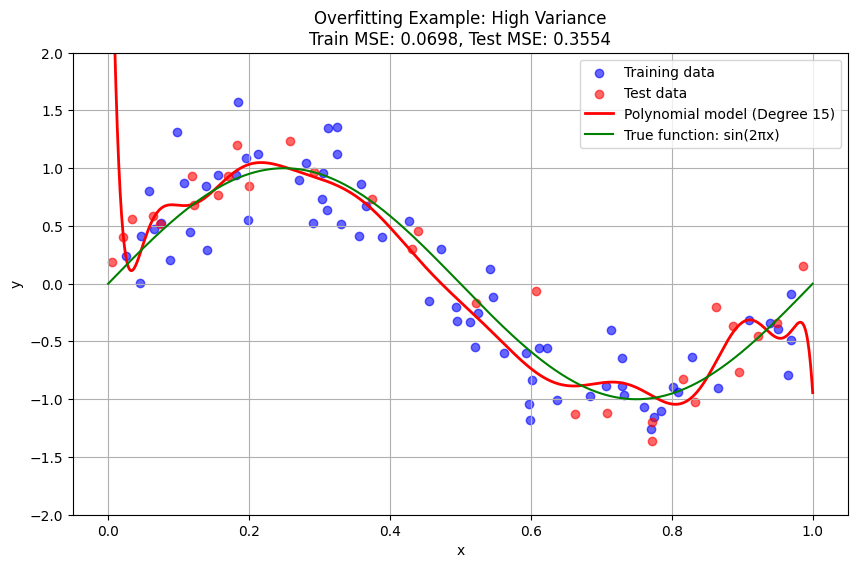

In [16]:
# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Training data')
plt.scatter(X_test, y_test, color='red', alpha=0.6, label='Test data')
plt.plot(X_plot, y_complex_pred, 'r-', linewidth=2, label=f'Polynomial model (Degree 15)')
plt.plot(X_true, y_true, 'g-', label='True function: sin(2πx)')
plt.title(f'Overfitting Example: High Variance\nTrain MSE: {complex_train_mse:.4f}, Test MSE: {complex_test_mse:.4f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.ylim(-2, 2)  # Limit y-axis to show the extreme oscillations
plt.show()

## Part 4: Finding the Right Balance

The goal is to find the sweet spot with the right model complexity:
- Not too simple (high bias)
- Not too complex (high variance)

Let's try multiple polynomial degrees and observe the bias-variance tradeoff.

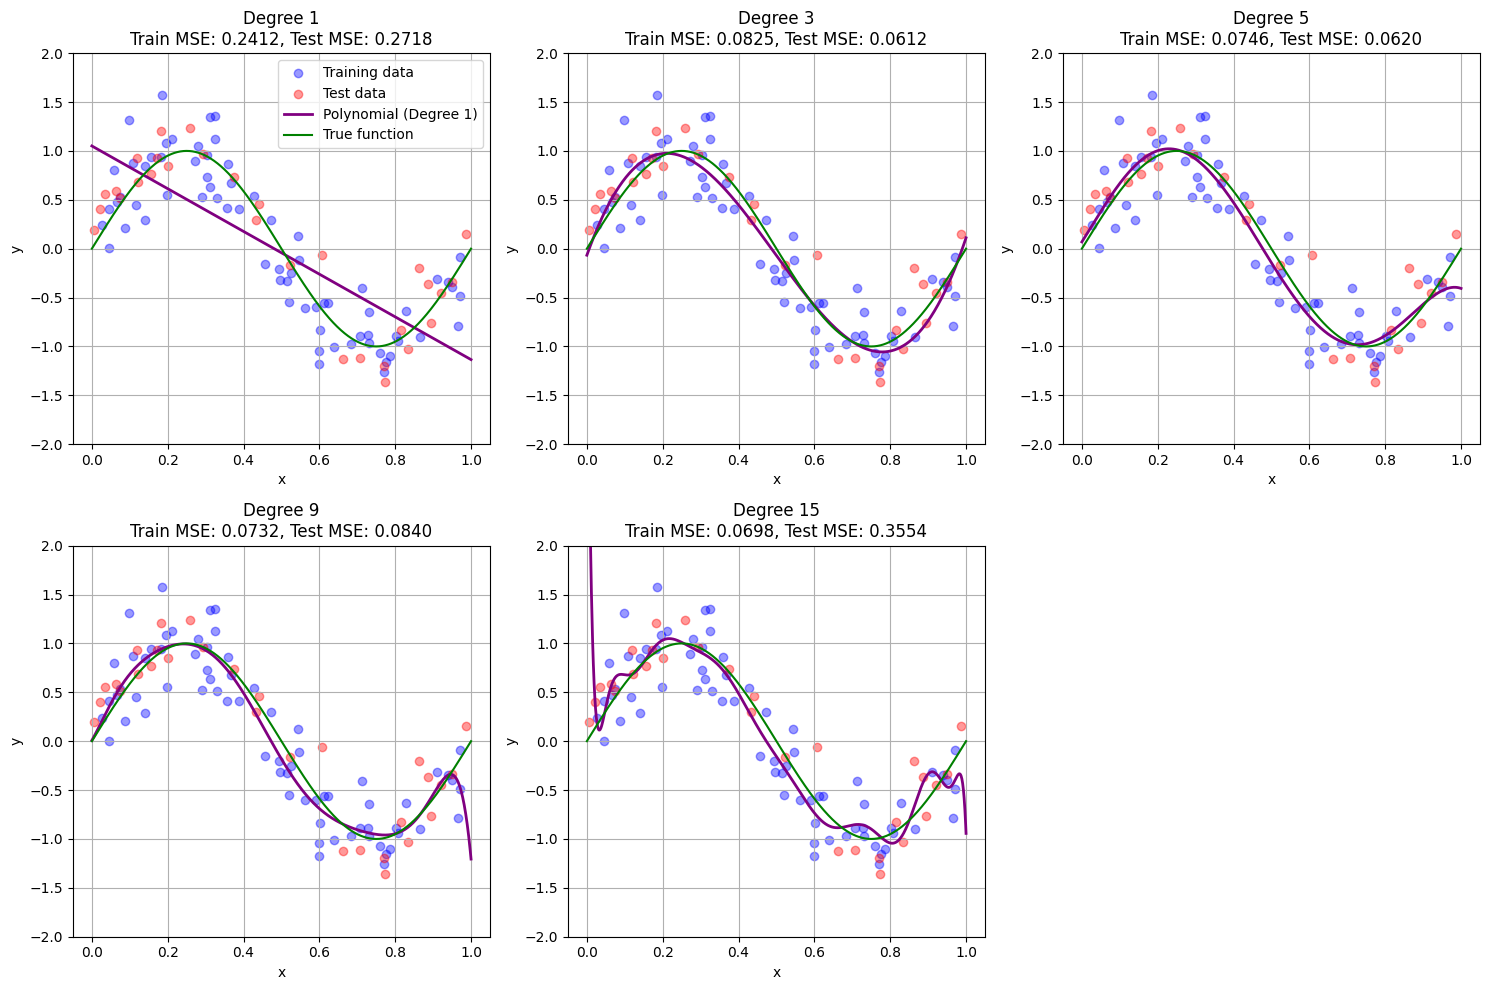

In [55]:
# %%
# Try polynomials of different degrees
degrees = [1, 3, 5, 9, 15]
plt.figure(figsize=(15, 10))
train_errors = []
test_errors = []
for i, degree in enumerate(degrees):
    # Create and fit the model
    model = make_pipeline(
        ...(degree=degree),
        ...()
    )
    ....fit(..., ...)
    
    # Make predictions
    y_pred = model....(X_plot)
    
    # Calculate errors
    y_train_pred = ...
    y_test_pred = ...
    train_mse = ...
    test_mse = ...
    
    train_errors.append(train_mse)
    test_errors.append(test_mse)
    
    # Visualize
    plt.subplot(2, 3, i+1)
    plt.scatter(X_train, y_train, color='blue', alpha=0.4, label='Training data')
    plt.scatter(X_test, y_test, color='red', alpha=0.4, label='Test data')
    plt.plot(X_plot, y_pred, 'purple', linewidth=2, label=f'Polynomial (Degree {degree})')
    plt.plot(X_true, y_true, 'g-', label='True function')
    
    plt.title(f'Degree {degree}\nTrain MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim(-2, 2)
    plt.grid(True)
    
    if i == 0:
        plt.legend()
plt.tight_layout()
plt.show()

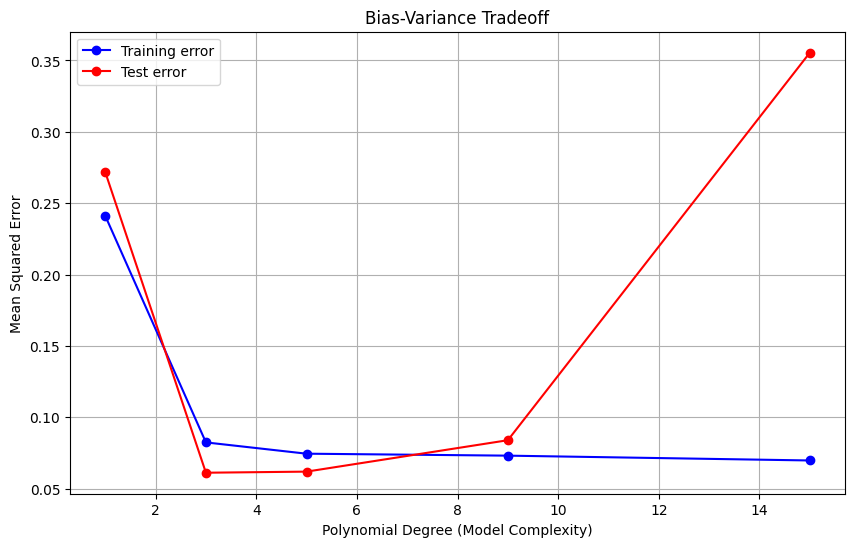

In [21]:
# %%
# Plot the training and test errors to see the bias-variance tradeoff
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, 'o-', color='blue', label='Training error')
plt.plot(degrees, test_errors, 'o-', color='red', label='Test error')
plt.xlabel('Polynomial Degree (Model Complexity)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff')
plt.grid(True)
plt.legend()
plt.show()

## Part 5: Regularization to Fight Overfitting

Regularization is a technique to prevent overfitting by adding a penalty term to the loss function.

Let's use a PyTorch neural network with different levels of weight decay (L2 regularization) to see how it affects the bias-variance tradeoff.

In [22]:
# %%
# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train.reshape(-1, 1))
y_train_tensor = torch.FloatTensor(y_train.reshape(-1, 1))
X_test_tensor = torch.FloatTensor(X_test.reshape(-1, 1))
y_test_tensor = torch.FloatTensor(y_test.reshape(-1, 1))
X_plot_tensor = torch.FloatTensor(X_plot)

In [23]:
# Define a neural network model
class SineApproximator(nn.Module):
    def __init__(self, hidden_size=50):
        super(SineApproximator, self).__init__()
        # linear layers
        self.fc1 = ...
        self.fc2 = ...
        self.fc3 = ... 
        # relu
        self.relu = ...
        
    def forward(self, x):
        x = ...
        x = self.relu(x)
        x = ...
        x = self.relu(x)
        x = ...
        return x

In [24]:
# Function to train the model with different weight decay values
def train_model_with_regularization(weight_decay, epochs=1000):
    model = SineApproximator()
    # MSE
    criterion = ...
    # ADAM
    optimizer = ...(model.parameters(), lr=0.01, ...)
    
    train_losses = []
    test_losses = []
    
    for epoch in range(epochs):
        # Training
        model.train()
        optimizer.zero_grad()
        outputs = ...
        loss = ...
        loss.backward()
        optimizer.step()
        
        # Evaluation
        if epoch % 100 == 0:
            model.eval()
            with torch.no_grad():
                train_preds = model(X_train_tensor)
                train_loss = criterion(train_preds, y_train_tensor).item()
                
                test_preds = model(X_test_tensor)
                test_loss = criterion(test_preds, y_test_tensor).item()
                
                train_losses.append(train_loss)
                test_losses.append(test_loss)
    
    # Final evaluation
    model.eval()
    with torch.no_grad():
        plot_preds = model(X_plot_tensor)
        train_preds = model(X_train_tensor)
        test_preds = model(X_test_tensor)
        final_train_loss = criterion(train_preds, y_train_tensor).item()
        final_test_loss = criterion(test_preds, y_test_tensor).item()
    
    return model, plot_preds.numpy(), final_train_loss, final_test_loss

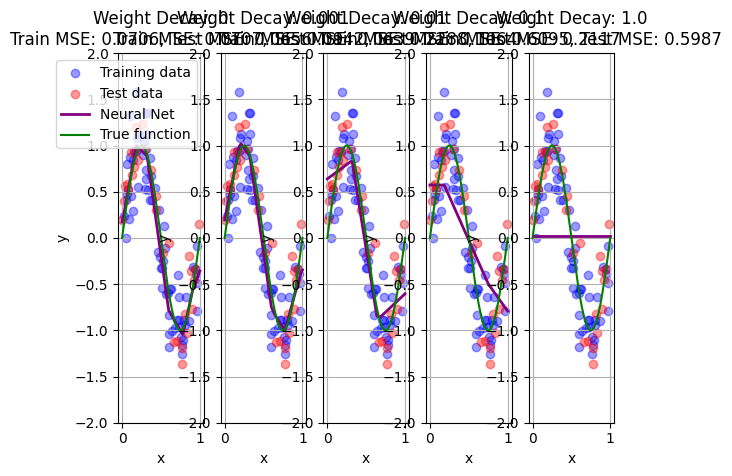

In [26]:
# %%
# Train models with different regularization strengths
weight_decays = [0, 0.001, 0.01, 0.1, 1.0]

plt.figure(figsize=(18, 5))
train_errors_reg = []
test_errors_reg = []
for i, wd in enumerate(weight_decays):
    model, predictions, train_loss, test_loss = train_model_with_regularization(wd)
    train_errors_reg.append(train_loss)
    test_errors_reg.append(test_loss)
    
    plt.subplot(1, len(weight_decays), i+1)
    plt.scatter(X_train, y_train, color='blue', alpha=0.4, label='Training data')
    plt.scatter(X_test, y_test, color='red', alpha=0.4, label='Test data')
    plt.plot(X_plot, predictions, 'purple', linewidth=2, label=f'Neural Net')
    plt.plot(X_true, y_true, 'g-', label='True function')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim(-2, 2)
    plt.grid(True)
    
    if i == 0:
        plt.legend()
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

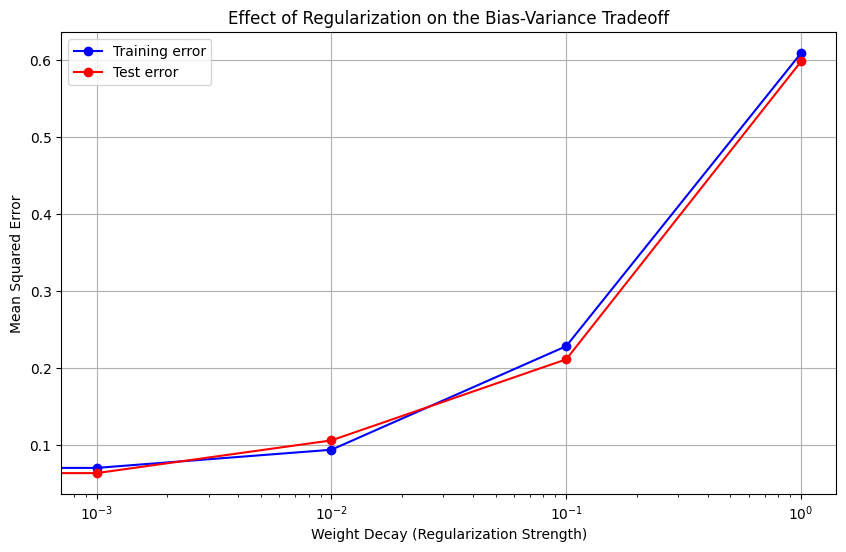

In [28]:
# %%
# Plot the regularization effect
plt.figure(figsize=(10, 6))
plt.plot(weight_decays, train_errors_reg, 'o-', color='blue', label='Training error')
plt.plot(weight_decays, test_errors_reg, 'o-', color='red', label='Test error')
plt.xscale('log')
plt.xlabel('Weight Decay (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Regularization on the Bias-Variance Tradeoff')
plt.grid(True)
plt.legend()
plt.show()

## Part 6: Cross-Validation for Model Selection

Cross-validation helps us pick the right model complexity by using different splits of the data.
Let's use k-fold cross-validation to find the optimal polynomial degree.

In [29]:
# %%
from sklearn.model_selection import KFold, cross_val_score

In [30]:
# Setup cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
degrees = [1, 2, 3, 4, 5, 7, 9, 11, 13, 15]

In [31]:
# Store cross-validation scores
cv_scores = []
train_scores = []

In [32]:
# Evaluate each polynomial degree
for degree in degrees:
    model = make_pipeline(...(degree=...), ...())
    
    # Get cross-validation scores (negative MSE)
    cv_score = -np.mean(cross_val_score(model, X.reshape(-1, 1), y, 
                                       scoring='neg_mean_squared_error', cv=kf))
    cv_scores.append(cv_score)
    
    # Fit on full training data to get training error
    model.fit(X_train.reshape(-1, 1), y_train)
    train_pred = model.predict(X_train.reshape(-1, 1))
    train_score = mean_squared_error(y_train, train_pred)
    train_scores.append(train_score)

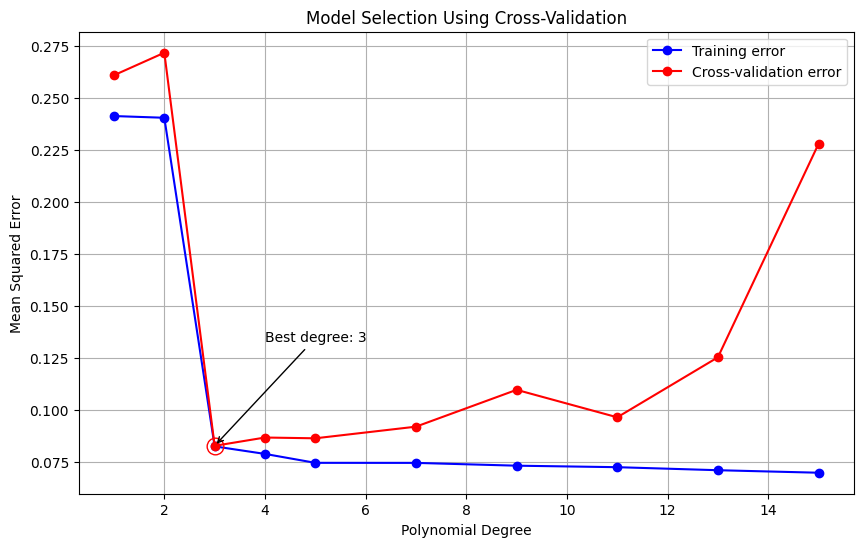

In [48]:
# %%
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_scores, 'o-', color='blue', label='Training error')
plt.plot(degrees, cv_scores, 'o-', color='red', label='Cross-validation error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Model Selection Using Cross-Validation')
plt.grid(True)
plt.legend()
# Highlight the best model
best_degree_idx = np.argmin(cv_scores)
best_degree = degrees[best_degree_idx]
min_error = cv_scores[best_degree_idx]
plt.plot(best_degree, min_error, 'ro', markersize=12, fillstyle='none')
plt.annotate(f'Best degree: {best_degree}', xy=(best_degree, min_error),
             xytext=(best_degree+1, min_error+0.05),
             arrowprops=dict(arrowstyle='->'))
plt.show()

## Part 7: Learning Curves

Learning curves show how model performance changes with increasing training data.
They help diagnose whether adding more data would help improve the model.

In [36]:
# %%
from sklearn.model_selection import learning_curve

In [37]:
# Generate learning curves for different model complexities
train_sizes = np.linspace(0.1, 1.0, 10)

In [38]:
# Plot learning curves for a simple model (degree=1)
simple_model = make_pipeline(PolynomialFeatures(degree=...), LinearRegression())
train_sizes_abs, train_scores_simple, test_scores_simple = learning_curve(
    simple_model, X.reshape(-1, 1), y, train_sizes=train_sizes, cv=5, scoring='neg_mean_squared_error')

In [39]:
# Plot learning curves for a complex model (degree=15)
complex_model = make_pipeline(PolynomialFeatures(degree=...), LinearRegression())
train_sizes_abs, train_scores_complex, test_scores_complex = learning_curve(
    complex_model, X.reshape(-1, 1), y, train_sizes=train_sizes, cv=5, scoring='neg_mean_squared_error')

In [40]:
# Plot learning curves for a good model (degree=best_degree)
good_model = make_pipeline(PolynomialFeatures(degree=best_degree), LinearRegression())
train_sizes_abs, train_scores_good, test_scores_good = learning_curve(
    good_model, X.reshape(-1, 1), y, train_sizes=train_sizes, cv=5, scoring='neg_mean_squared_error')

In [41]:
# Convert to positive MSE for plotting
train_scores_simple = -np.mean(train_scores_simple, axis=1)
test_scores_simple = -np.mean(test_scores_simple, axis=1)
train_scores_complex = -np.mean(train_scores_complex, axis=1)
test_scores_complex = -np.mean(test_scores_complex, axis=1)
train_scores_good = -np.mean(train_scores_good, axis=1)
test_scores_good = -np.mean(test_scores_good, axis=1)

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

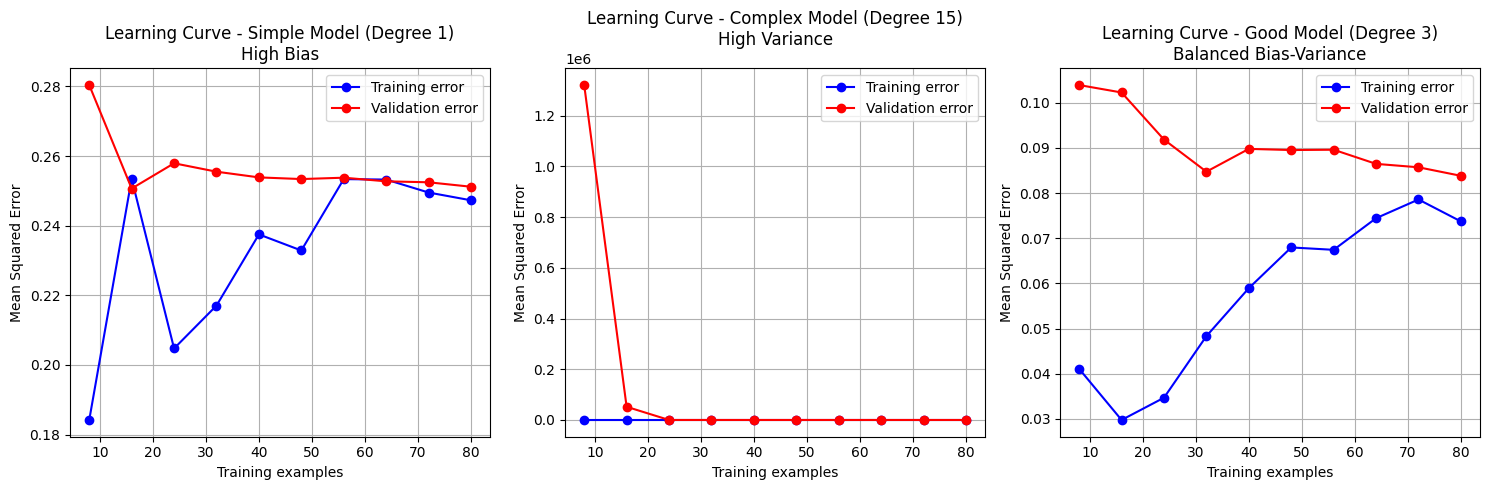

In [52]:
# %%
# Plot the learning curves
plt.figure(figsize=(15, 5))
# Simple model (high bias)
plt.subplot(1, 3, 1)
plt.plot(train_sizes_abs, train_scores_simple, 'o-', color='blue', label='Training error')
plt.plot(train_sizes_abs, test_scores_simple, 'o-', color='red', label='Validation error')
plt.title(f'Learning Curve - Simple Model (Degree 1)\nHigh Bias')
plt.xlabel('Training examples')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
# Complex model (high variance)
plt.subplot(1, 3, 2)
plt.plot(train_sizes_abs, train_scores_complex, 'o-', color='blue', label='Training error')
plt.plot(train_sizes_abs, test_scores_complex, 'o-', color='red', label='Validation error')
plt.title(f'Learning Curve - Complex Model (Degree 15)\nHigh Variance')
plt.xlabel('Training examples')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
# Good model (balanced)
plt.subplot(1, 3, 3)
plt.plot(train_sizes_abs, train_scores_good, 'o-', color='blue', label='Training error')
plt.plot(train_sizes_abs, test_scores_good, 'o-', color='red', label='Validation error')
plt.title(f'Learning Curve - Good Model (Degree {best_degree})\nBalanced Bias-Variance')
plt.xlabel('Training examples')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()